In [1]:
import pandas as pd

In [3]:
import requests as req

In [5]:
url = 'https://dbpedia.org/resource/Skopje'
headers = {'Accept': 'application/ld+json'}

In [6]:
r = req.get(url,headers=headers)

In [9]:
r

<Response [200]>

In [7]:
result = r.json()

In [ ]:
result

In [11]:
attributes = result.get('@graph')[0]

In [ ]:
attributes

In [16]:
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 26.1 MB/s 
     |████████████████████████████████| 41 kB 625 kB/s 


In [17]:
from rdflib import Graph, URIRef, Literal

In [18]:
from rdflib.namespace import RDFS, FOAF

In [19]:
g = Graph()

In [20]:
g.parse(url)

<Graph identifier=N5be852b8bbe84c55b6c5692c60bfcb9f (<class 'rdflib.graph.Graph'>)>

In [24]:
skopje = URIRef(url)
finki = URIRef("http://finki.ukim.mk/")
location = URIRef("http://dbpedia.org/ontology/location")
name = Literal('FINKI, Skopje')

In [25]:
len(g)

1240

In [26]:
g.add((finki,location,skopje))
g.add((finki,RDFS.label,name))

<Graph identifier=N5be852b8bbe84c55b6c5692c60bfcb9f (<class 'rdflib.graph.Graph'>)>

In [27]:
len(g)

1242

In [ ]:
g.serialize(format='turtle')

In [30]:
for s,p,o in g.triples((None,None,None)):
  print(s,p,o)

http://dbpedia.org/resource/Skopje http://www.w3.org/2002/07/owl#sameAs http://sv.dbpedia.org/resource/Skopje
http://dbpedia.org/resource/Skopje http://dbpedia.org/property/wikiPageUsesTemplate http://dbpedia.org/resource/Template:Skopje_(close_area)
http://dbpedia.org/resource/Skopje http://xmlns.com/foaf/0.1/depiction http://commons.wikimedia.org/wiki/Special:FilePath/Del_od_Skopje,_1950ti.jpg
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/File:Centarot_na_Skopje_pred_zemjotresot.jpg
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Lipkovo_Municipality
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Bulgaria_during_World_War_II
http://dbpedia.org/resource/Skopje http://www.w3.org/2002/07/owl#sameAs http://ro.dbpedia.org/resource/Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#

In [31]:
from pandas.plotting import scatter_matrix

In [35]:
import urllib

In [32]:
pd.options.display.float_format = '{:,.0f}'.format

In [53]:
query = """
SELECT * 
WHERE {
?company dbo:industry ?industry ;
                 dbo:numberOfEmployees ?numEmployees ;
                 dbo:revenue ?revenue ;
                 foaf:name ?name ;
                 foaf:isPrimaryTopicOf ?wikipage  .
FILTER (?numEmployees > 1000 && ?numEmployees < 200000)
FILTER (xsd:integer(?revenue) > 500000 &&  xsd:integer(?revenue) < 100000000000)
}
"""

In [54]:
endpoint = "http://dbpedia.org/sparql"

In [55]:
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org',
                                'query': query,
                                'format': 'text/csv'})

In [56]:
data = pd.read_csv(endpoint + '?' + param)

In [57]:
data

,company,industry,numEmployees,revenue,name,wikipage
0,http://dbpedia.org/resource/Alkermes_(company),http://dbpedia.org/resource/Biotechnology,1200,"1,000,000,000",Alkermes plc,http://en.wikipedia.org/wiki/Alkermes_(company)
1,http://dbpedia.org/resource/Allegheny_Health_N...,http://dbpedia.org/resource/Health_care,2600,"4,020,000,000",Allegheny Health Network,http://en.wikipedia.org/wiki/Allegheny_Health_...
2,http://dbpedia.org/resource/Allegheny_Health_N...,http://dbpedia.org/resource/Health_care,21000,"4,020,000,000",Allegheny Health Network,http://en.wikipedia.org/wiki/Allegheny_Health_...
3,http://dbpedia.org/resource/Allegion,http://dbpedia.org/resource/Security,10000,"2,719,000,000",NaN,http://en.wikipedia.org/wiki/Allegion
4,http://dbpedia.org/resource/Allegion,http://dbpedia.org/resource/Security,10000,"2,719,000,000",Allegion plc,http://en.wikipedia.org/wiki/Allegion
...,...,...,...,...,...,...
5529,http://dbpedia.org/resource/Synthes,http://dbpedia.org/resource/Health_care,11430,"3,687,000,000",Synthes Holding AG,http://en.wikipedia.org/wiki/Synthes
5530,http://dbpedia.org/resource/WesTrac,http://dbpedia.org/resource/Construction,3500,"2,452,000,000",WesTrac,http://en.wikipedia.org/wiki/WesTrac
5531,http://dbpedia.org/resource/WesTrac,http://dbpedia.org/resource/Building,3500,"2,452,000,000",WesTrac,http://en.wikipedia.org/wiki/WesTrac
5532,http://dbpedia.org/resource/WesTrac,http://dbpedia.org/resource/Mining,3500,"2,452,000,000",WesTrac,http://en.wikipedia.org/wiki/WesTrac


In [58]:
data = data.drop_duplicates(subset='company')

In [59]:
data

,company,industry,numEmployees,revenue,name,wikipage
0,http://dbpedia.org/resource/Alkermes_(company),http://dbpedia.org/resource/Biotechnology,1200,"1,000,000,000",Alkermes plc,http://en.wikipedia.org/wiki/Alkermes_(company)
1,http://dbpedia.org/resource/Allegheny_Health_N...,http://dbpedia.org/resource/Health_care,2600,"4,020,000,000",Allegheny Health Network,http://en.wikipedia.org/wiki/Allegheny_Health_...
3,http://dbpedia.org/resource/Allegion,http://dbpedia.org/resource/Security,10000,"2,719,000,000",NaN,http://en.wikipedia.org/wiki/Allegion
7,http://dbpedia.org/resource/Allergan,http://dbpedia.org/resource/Pharmaceutical_ind...,17800,"16,089,000,000",Allergan plc,http://en.wikipedia.org/wiki/Allergan
8,"http://dbpedia.org/resource/Allergan,_Inc.",http://dbpedia.org/resource/Aesthetic_medicine,11400,"6,200,000,000","Allergan, Inc.","http://en.wikipedia.org/wiki/Allergan,_Inc."
...,...,...,...,...,...,...
5522,http://dbpedia.org/resource/Roots_Canada,http://dbpedia.org/resource/Retail,2000,"329,865,000",Roots Corporation,http://en.wikipedia.org/wiki/Roots_Canada
5527,http://dbpedia.org/resource/SIA_Engineering_Co...,http://dbpedia.org/resource/Aircraft_maintenance,6848,"1,104,100,000",SIA Engineering Company,http://en.wikipedia.org/wiki/SIA_Engineering_C...
5528,http://dbpedia.org/resource/Dyno_Nobel,http://dbpedia.org/resource/Chemical_substance,3000,"626,400,000",Dyno Nobel,http://en.wikipedia.org/wiki/Dyno_Nobel
5529,http://dbpedia.org/resource/Synthes,http://dbpedia.org/resource/Health_care,11430,"3,687,000,000",Synthes Holding AG,http://en.wikipedia.org/wiki/Synthes


In [60]:
data[['name','numEmployees','revenue']].head()

,name,numEmployees,revenue
0,Alkermes plc,1200,"1,000,000,000"
1,Allegheny Health Network,2600,"4,020,000,000"
3,NaN,10000,"2,719,000,000"
7,Allergan plc,17800,"16,089,000,000"
8,"Allergan, Inc.",11400,"6,200,000,000"


In [61]:
data.revenue.describe()

count            3,836
mean     7,188,951,135
std     13,346,137,446
min            547,164
25%        730,800,000
50%      2,205,000,000
75%      7,200,000,000
max     99,900,000,000
Name: revenue, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3246913c70>,
      dtype=object)

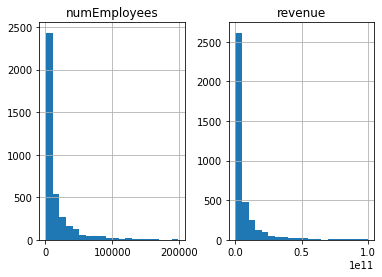

In [62]:
data.hist(bins=20)

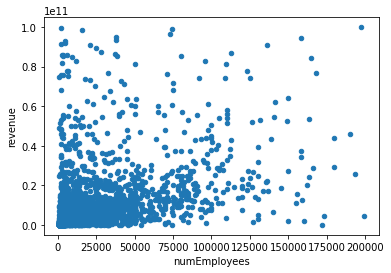

In [63]:
data.plot.scatter(x='numEmployees',y='revenue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32466e07f0>,
      dtype=object)

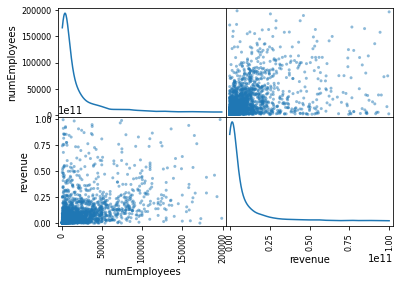

In [65]:
scatter_matrix(data,diagonal='kde')

In [66]:
grouped = data.groupby('industry').sum()

In [79]:
grouped.revenue.sort_values()

industry
http://dbpedia.org/resource/Accounting                        9,800,000
http://dbpedia.org/resource/Delivery_(commerce)              14,000,000
http://dbpedia.org/resource/Coal                             34,740,000
http://dbpedia.org/resource/Ice_cream_parlor                 51,000,000
http://dbpedia.org/resource/Launch_service_provider          62,240,000
                                                             ...       
http://dbpedia.org/resource/Automotive_industry         928,701,129,000
http://dbpedia.org/resource/Conglomerate_(company)    1,096,233,600,000
http://dbpedia.org/resource/Petroleum_industry        1,294,278,700,000
http://dbpedia.org/resource/Retail                    1,615,328,689,596
http://dbpedia.org/resource/Financial_services        2,932,912,031,790
Name: revenue, Length: 665, dtype: float64